<a href="https://www.kaggle.com/code/aashirnoman/working-with-audio-data-librosa?scriptVersionId=120477441" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle
sns.set_theme(style='white',palette=None)
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle=cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Terms to know for Audio in Digital Form:

## Frequency (Hz)
- Frequency describes the differences of wave lengths.
- We interperate frequency has high and low pitches.

<img src="https://uploads-cdn.omnicalculator.com/images/britannica-wave-frequency.jpg" width="400"/>

## Intensity (db / power)
- Intensity describes the amplitude (height) of the wave.

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780124722804500162-f13-15-9780124722804.gif" width="400"/>

## Sample Rate
- Sample rate is specific to how the computer reads in the audio file.
- Think of it as the "resolution" of the audio.

<img src="https://www.headphonesty.com/wp-content/uploads/2019/07/Sample-Rate-Bit-Depth-and-Bit-Rate.jpeg" width="400"/>


In [2]:
audio_files = glob('../input/ravdess-emotional-speech-audio/*/*.wav')

In [3]:
#Play Audio File
ipd.Audio(audio_files[0])

In [4]:
y , sr = librosa.load(audio_files[0])
print(f'y:{y[:10]}')
print(f'Shape of y:{y.shape}')
print(f'sr:{sr}')

y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape of y:(77988,)
sr:22050


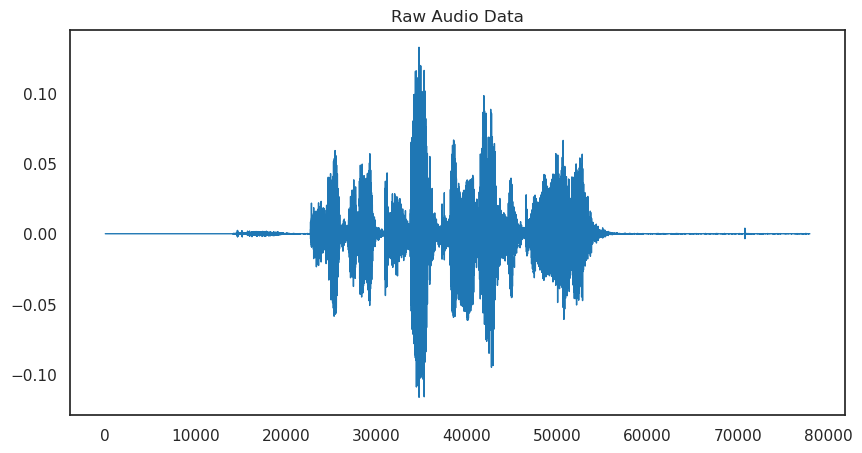

In [5]:
pd.Series(y).plot(figsize=(10,5),lw=1,title='Raw Audio Data',color=color_pal[0])
plt.show()

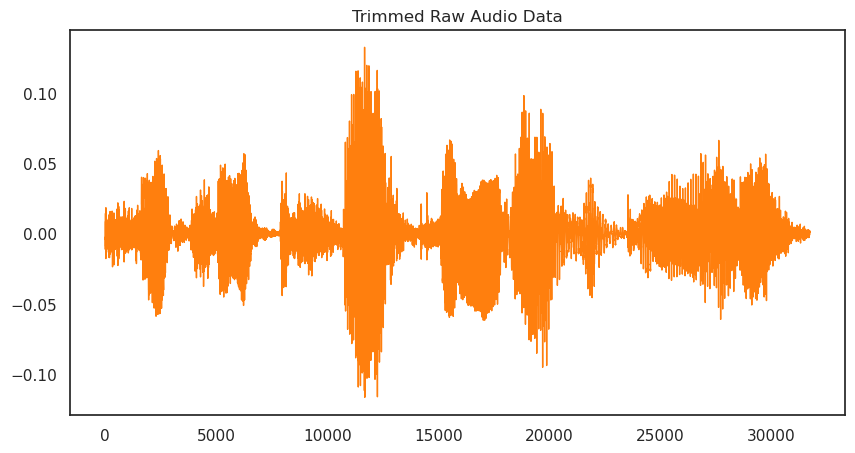

In [6]:
y_trimmed , _ =librosa.effects.trim(y,top_db=20)
pd.Series(y_trimmed).plot(figsize=(10,5),lw=1,title='Trimmed Raw Audio Data',color=color_pal[1])
plt.show()

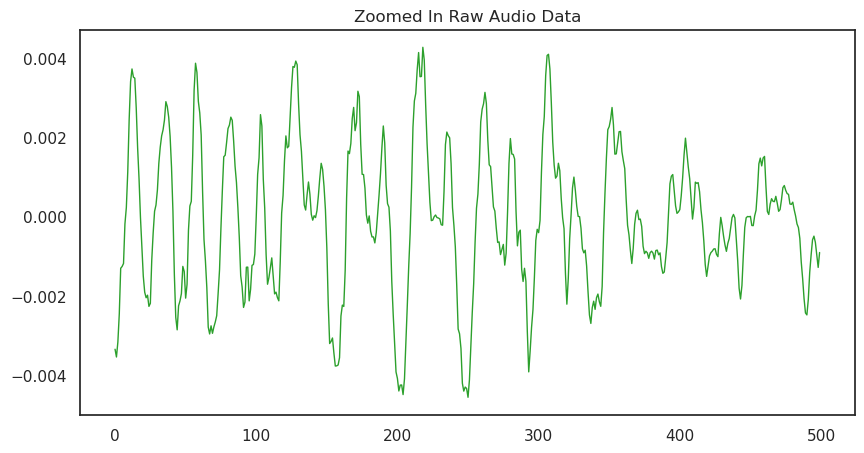

In [7]:
pd.Series(y[30000:30500]).plot(figsize=(10,5),lw=1,title='Zoomed In Raw Audio Data',color=color_pal[2])
plt.show()

# SpectoGram

In [8]:
D=librosa.stft(y)
S_db=librosa.amplitude_to_db(np.abs(D),ref=np.max)
S_db.shape

(1025, 153)

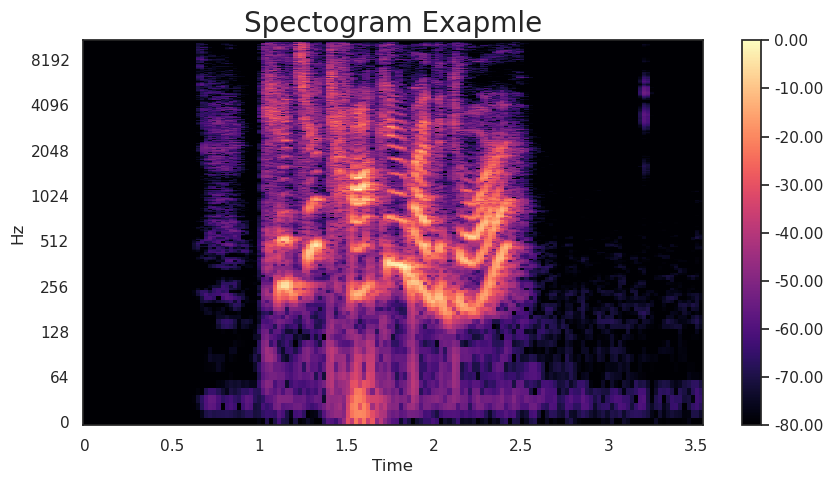

In [9]:
# Plot The Transformed Audio Data
fig,ax=plt.subplots(figsize=(10,5))
img=librosa.display.specshow(S_db,
                            x_axis='time',
                            y_axis='log',
                            ax=ax)
ax.set_title('Spectogram Exapmle',fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

# Mel SpectoGram

In [10]:
S=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128*2)
S_db_mel=librosa.amplitude_to_db(S,ref=np.max)
S_db_mel.shape

(256, 153)

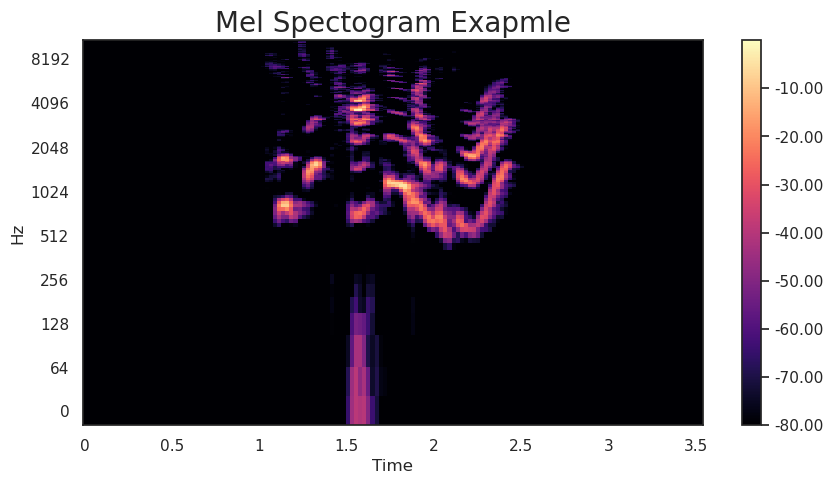

In [11]:
# Plot The Transformed Audio Data
fig,ax=plt.subplots(figsize=(10,5))
img=librosa.display.specshow(S_db_mel,
                            x_axis='time',
                            y_axis='log',
                            ax=ax)
ax.set_title('Mel Spectogram Exapmle',fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()